In [31]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from datetime import datetime
from __future__ import division

In [32]:
AAPL = pd.read_csv('AAPL.csv')
AMZN =  pd.read_csv('AMZN.csv')
FB = pd.read_csv('FB.csv')
GOOG =  pd.read_csv('GOOG.csv')
NFLX = pd.read_csv('NFLX.csv')
TSLA = pd.read_csv('TSLA.csv')

In [33]:
#dataframe with all close cols for each df
closing_df1 = pd.DataFrame(AAPL['Close'])
close1  = closing_df1.rename(columns={"Close": "AAPL_close"})

closing_df2 = pd.DataFrame(GOOG['Close'])
close2  = closing_df2.rename(columns={"Close": "GOOG_close"})

closing_df3 = pd.DataFrame(NFLX['Close'])
close3  = closing_df3.rename(columns={"Close": "NFLX_close"})

closing_df4 = pd.DataFrame(AMZN['Close'])
close4  = closing_df4.rename(columns={"Close": "AMZN_close"})
closing_df5 = pd.DataFrame(FB['Close'])
close5  = closing_df4.rename(columns={"Close": "FB_close"})
closing_df6 = pd.DataFrame(TSLA['Close'])
close6 = closing_df4.rename(columns={"Close": "TSLA_close"})

closing_df = pd.concat([close1, close2, close3, close4,close5 ,close6], axis=1)
closing_df.head()

,AAPL_close,GOOG_close,NFLX_close,AMZN_close,FB_close,TSLA_close
0,61.380001,1102.489990,342.390015,1885.839966,1885.839966,1885.839966
1,64.610001,1161.750000,362.989990,1955.489990,1955.489990,1955.489990
2,61.935001,1110.709961,357.119995,1900.099976,1900.099976,1900.099976
3,63.702499,1146.819946,370.959991,1963.949951,1963.949951,1963.949951
4,63.572498,1162.810059,375.500000,1949.719971,1949.719971,1949.719971


In [34]:
tech_returns = closing_df.pct_change()

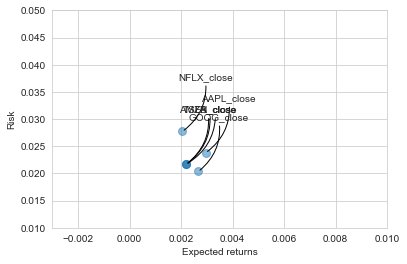

In [35]:
#comparing the expected return with the standard deviation of the daily returns.
rets = tech_returns.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.ylim([0.01,0.050])
plt.xlim([-0.003,0.010])
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='black'))

In [36]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()
AMZN['Daily Return'] = AMZN['Close'].pct_change()
FB['Daily Return'] = FB['Close'].pct_change()
GOOG['Daily Return'] = GOOG['Close'].pct_change()
NFLX['Daily Return'] = NFLX['Close'].pct_change()
TSLA['Daily Return'] = TSLA['Close'].pct_change()

#### DEFINING RISK PARAMETERS:
We can treat value at risk as the amount of money we could
expect to lose (aka putting at risk) for a given confidence interval.

#### Value at risk using bootstrap method

For this method we will calculate the empirical quantiles from a histogram of daily returns.

In [37]:
import warnings
warnings.filterwarnings('ignore')

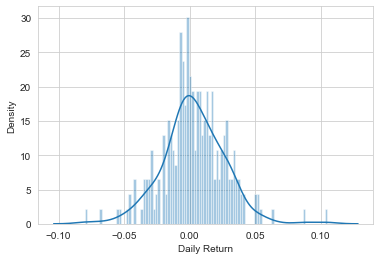

In [38]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)
plt.show()

In [39]:
rets.head()

,AAPL_close,GOOG_close,NFLX_close,AMZN_close,FB_close,TSLA_close
1,0.052623,0.053751,0.060165,0.036933,0.036933,0.036933
2,-0.041402,-0.043934,-0.016171,-0.028325,-0.028325,-0.028325
3,0.028538,0.032511,0.038754,0.033603,0.033603,0.033603
4,-0.002041,0.013943,0.012239,-0.007246,-0.007246,-0.007246
5,-0.052617,-0.049183,-0.030413,-0.021552,-0.021552,-0.021552


In [40]:
emp = rets['AAPL_close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.03434386527050781


#### CONCLUSION:
The 0.05 empirical quantile of daily returns is at -0.034. That means that with 95% confidence, the worst daily loss will not exceed 3.4%. If someone has a 1 million dollar investment, our one-day 5% VaR is 0.034 * 1,000,000 = $34,000.

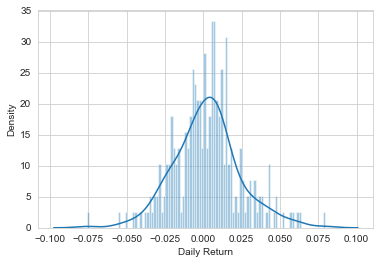

In [41]:
sns.distplot(AMZN['Daily Return'].dropna(), bins=100)
plt.show()

In [42]:
emp = rets['AMZN_close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.03051012620655047


#### CONCLUSION
The 0.05 empirical quantile of daily returns is at -0.030. That means that with 95% confidence, the worst daily loss will not exceed 3.0%. If someone has a 1 million dollar investment, our one-day 5% VaR is 0.030 * 1,000,000 = $30,000.

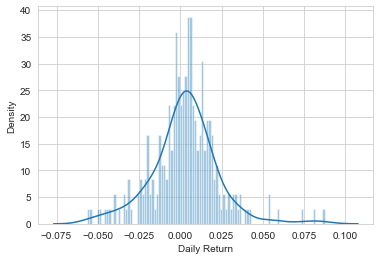

In [43]:
sns.distplot(GOOG['Daily Return'].dropna(), bins=100)
plt.show()

In [44]:
emp = rets['GOOG_close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.03237290778739699


#### CONCLUSION
The 0.05 empirical quantile of daily returns is at -0.032. That means that with 95% confidence, the worst daily loss will not exceed 3.0%. If someone has a 1 million dollar investment, our one-day 5% VaR is 0.032 * 1,000,000 = $32,000.

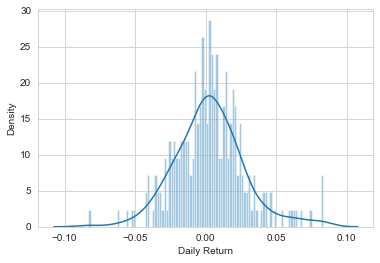

In [45]:
sns.distplot(FB['Daily Return'].dropna(), bins=100)
plt.show()

In [46]:
emp = rets['FB_close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.03051012620655047


#### CONCLUSION
The 0.05 empirical quantile of daily returns is at -0.030. That means that with 95% confidence, the worst daily loss will not exceed 3.0%. If someone has a 1 million dollar investment, our one-day 5% VaR is 0.030 * 1,000,000 = $30,000.

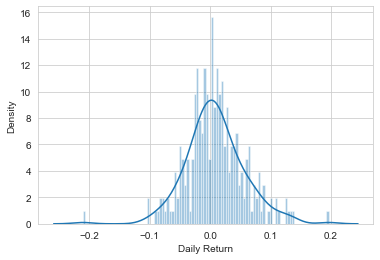

In [47]:
sns.distplot(TSLA['Daily Return'].dropna(), bins=100)
plt.show()

In [48]:
emp = rets['TSLA_close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.03051012620655047


#### CONCLUSION
The 0.05 empirical quantile of daily returns is at -0.030. That means that with 95% confidence, the worst daily loss will not exceed 3.0%. If someone has a 1 million dollar investment, our one-day 5% VaR is 0.030 * 1,000,000 = $30,000.

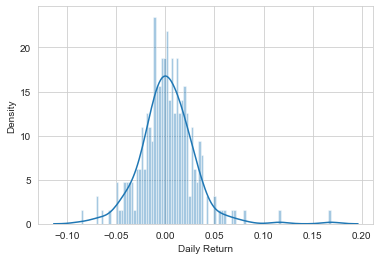

In [49]:
sns.distplot(NFLX['Daily Return'].dropna(), bins=100)
plt.show()

In [50]:
emp = rets['NFLX_close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.04033702925763355


#### CONCLUSION
The 0.05 empirical quantile of daily returns is at -0.040. That means that with 95% confidence, the worst daily loss will not exceed 4.0%. If someone has a 1 million dollar investment, our one-day 5% VaR is 0.040 * 1,000,000 = $40,000.